<a href="https://colab.research.google.com/github/3B032013/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作fashion_mnist數據庫

## 資料預處理

In [ ]:
from tensorflow.keras import utils   # tf 2.0
import numpy as np
np.random.seed(10)

In [ ]:
from keras.datasets import fashion_mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [ ]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [ ]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

In [ ]:
# 資料類型標籤
labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## 建立模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
#將「輸入層」與「隱藏層1」加入模型

In [ ]:
model.add(Dense(units=1000,
        input_dim=784,
        kernel_initializer='normal',
        activation='relu'))
model.add(Dropout(0.5))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#將「隱藏層2」加入模型

In [ ]:
model.add(Dense(units=1000,
        kernel_initializer='normal',
        activation='relu'))
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(units=10,
        kernel_initializer='normal',
        activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000)                │       1,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,796,010 (6.85 MB)

 Trainable params: 1,796,010 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

None


## 訓練模型

*   損失函數使用crosse ntropy
*   優化器(optimizer)使用adam，較SGD(梯度下降)快速收斂損失誤差

In [ ]:
model.compile(loss='categorical_crossentropy',
       optimizer='adam', metrics=['accuracy'])

## 驗證(validation)用資料

*   從訓練資料當中切出20%作為驗證(validation)用資料
*   全部訓練資料60000筆資料(服飾圖片)當中，12000筆當作驗證資料，故真正訓練資料只剩48000筆。



## 批次大小(batch_size)


*   每一訓練回合(epoch)，設定每一批次輸入200筆資料(服飾圖片)，所以，每一epoch，有48000/200=280批次。
*   每一批次輸入200筆資料(服飾圖片)，所以：神經網路輸入資料的形狀為(200, 784)
*   第一隱藏層輸出資料的形狀為(200, 256)，輸出層輸出資料的形狀為(200, 10)。







In [ ]:
train_history =model.fit(x=x_Train_normalize,
             y=y_Train_OneHot,validation_split=0.2,
             epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 13s - 52ms/step - accuracy: 0.7705 - loss: 0.6468 - val_accuracy: 0.8259 - val_loss: 0.4502
Epoch 2/10
240/240 - 9s - 36ms/step - accuracy: 0.8346 - loss: 0.4610 - val_accuracy: 0.8610 - val_loss: 0.3787
Epoch 3/10
240/240 - 9s - 38ms/step - accuracy: 0.8471 - loss: 0.4213 - val_accuracy: 0.8683 - val_loss: 0.3699
Epoch 4/10
240/240 - 10s - 41ms/step - accuracy: 0.8525 - loss: 0.4058 - val_accuracy: 0.8657 - val_loss: 0.3525
Epoch 5/10
240/240 - 11s - 45ms/step - accuracy: 0.8592 - loss: 0.3804 - val_accuracy: 0.8733 - val_loss: 0.3437
Epoch 6/10
240/240 - 10s - 42ms/step - accuracy: 0.8630 - loss: 0.3739 - val_accuracy: 0.8797 - val_loss: 0.3337
Epoch 7/10
240/240 - 10s - 40ms/step - accuracy: 0.8680 - loss: 0.3580 - val_accuracy: 0.8800 - val_loss: 0.3325
Epoch 8/10
240/240 - 10s - 44ms/step - accuracy: 0.8706 - loss: 0.3490 - val_accuracy: 0.8768 - val_loss: 0.3422
Epoch 9/10
240/240 - 10s - 41ms/step - accuracy: 0.8736 - loss: 0.3414 - val_accuracy: 0.8779 - va

## 準確率(accuracy)與損失(loss)


*   每一epoch的每一批次訓練後，都會計算神經網路的訓練後的損失(誤差)與準確率，並進行神經網路的參數調整，以降低損失(誤差)：
  *   利用梯度下降法計算神經網路參數的調整量
  *   利用倒傳遞方式進行參數大小調整
*   
每一epoch訓練後，計算神經網路所有批次的平均準確率(accuracy)與平均損失(loss)，如上。
*   每一epoch訓練後，用驗證資料驗證神經網路的準確率(val_accuracy)與損失(val_loss)，如上。







## 以圖形顯示訓練過程

In [ ]:
train_history.history

{'accuracy': [0.770520806312561,
  0.8346250057220459,
  0.8470625281333923,
  0.8525208234786987,
  0.8592291474342346,
  0.8630208373069763,
  0.8679583072662354,
  0.8705833554267883,
  0.8735833168029785,
  0.8753958344459534],
 'loss': [0.6468077301979065,
  0.46098583936691284,
  0.42128756642341614,
  0.40584781765937805,
  0.3804416358470917,
  0.3739391565322876,
  0.3580365777015686,
  0.34896257519721985,
  0.3414401412010193,
  0.3358420133590698],
 'val_accuracy': [0.8259166479110718,
  0.8610000014305115,
  0.8682500123977661,
  0.8656666874885559,
  0.8732500076293945,
  0.8796666860580444,
  0.8799999952316284,
  0.8768333196640015,
  0.877916693687439,
  0.8851666450500488],
 'val_loss': [0.4502084255218506,
  0.37870198488235474,
  0.3699324429035187,
  0.352517694234848,
  0.34370145201683044,
  0.333709180355072,
  0.33249983191490173,
  0.3422078490257263,
  0.33204546570777893,
  0.3195471465587616]}

In [ ]:
import matplotlib.pyplot as plt

# 畫出訓練過程每一個epoch訓練資料與驗證資料各自準確率(accuracy)的變化，或者損失誤差(loss)的變化
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

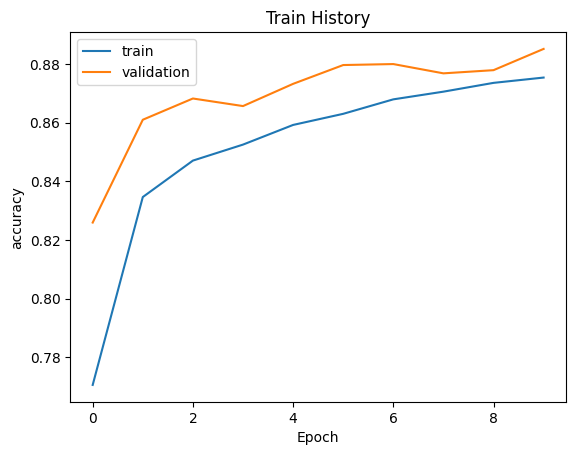

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

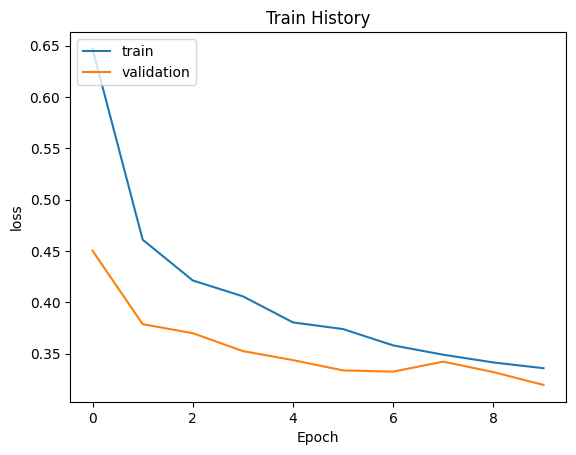

In [ ]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8767 - loss: 0.3399

accuracy= 0.8759999871253967


## 進行預測

In [ ]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# 10000個預測結果：二維陣列(10000, 10)，每一個預測結果:10個阿拉伯數字可能的機率
prediction.shape

(10000, 10)

In [ ]:
# 第666號測試資料預測結果，數字7機率最高
prediction[666]

array([0.        , 0.        , 0.        , 0.99999994, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
# 將機率最高的阿拉伯數字(7)找出來，作為預測結果(標籤)
predicted_lable = np.argmax(prediction[666])
predicted_lable

np.int64(3)

神經網路預測是： 3
實際是： 3


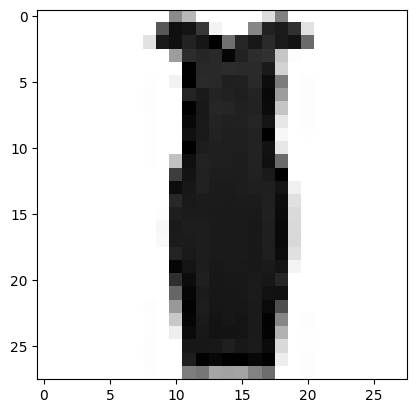

In [ ]:
import matplotlib.pyplot as plt

print('神經網路預測是：', predicted_lable)
print('實際是：', y_test_label[666])
plt.imshow(x_Test[666].reshape(28,28), cmap='Greys');  # 測試圖片需reshape為原來28x28

In [ ]:
# 一次呈現數張測試資料(圖片)、預測結果與真實結果，最多25張，預設10張
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=", predict="+str(np.argmax(prediction[idx]))

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

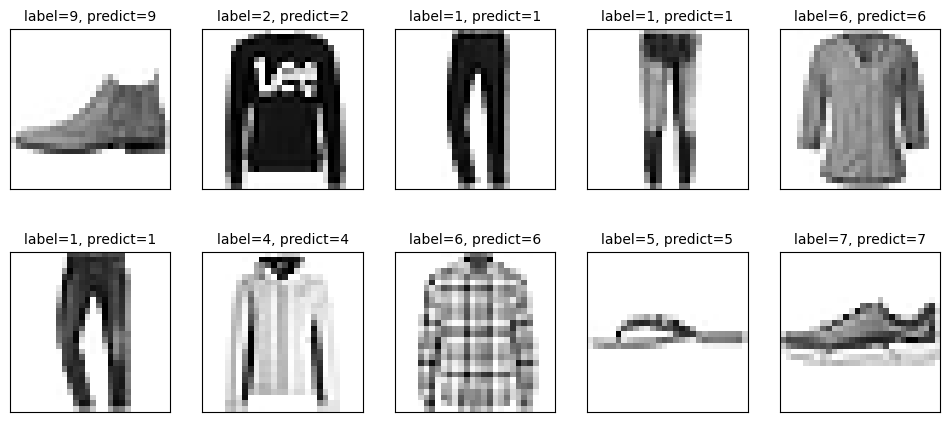

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0)

## confusion matrix (混淆矩陣)



*   預測結果與真實結果相同或不同的情形



In [ ]:
import pandas as pd
# 將10000個預測結果一一轉換為
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,897,7,7,27,9,0,43,0,10,0
1,2,974,1,18,2,0,1,0,2,0
2,26,7,719,9,204,0,28,0,6,1
3,36,18,6,864,60,0,10,0,6,0
4,0,1,63,22,885,0,25,0,4,0
5,0,0,0,0,0,947,0,25,1,27
6,227,5,106,33,136,0,470,0,23,0
7,0,0,0,0,0,9,0,948,0,43
8,3,1,1,3,6,1,0,5,980,0


In [ ]:
# 每一筆測試資料的真實結果標籤(label)與預測結果標籤(predict)的表格(df)

df = pd.DataFrame({'label': y_test_label, 'predict': predicted_labels})
df[:10] # 表格前10筆測試資料

,label,predict
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
5,1,1
6,4,4
7,6,6
8,5,5
9,7,7


In [ ]:
df[(df.label==5)&(df.predict==3)]  # 真實標籤為5，卻預測為3

,label,predict


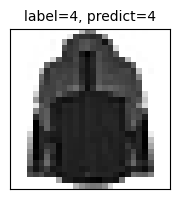

In [ ]:

plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=340,num=1)

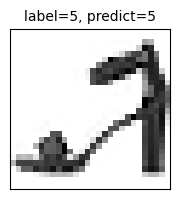

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=1289,num=1)